<a href="https://colab.research.google.com/github/Mariano-Rojas/Desafio-MeLi-Rojas/blob/main/MELI_Ejercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJ 1: Explorar las ofertas relámpago**

Realización: Mariano Iván Rojas Flores



En el presente archivo se presentará la resolución al ejercicio 1 del desafío técnico de Mercado Libre.

En este ejercicio se solicita realizar un Análisis Exploratorio de Datos (EDA), sobre un archivo que contiene información de ofertas relámpago en un país determinado.

La resolución se estructura de la siguiente manera:

1) Carga de librerías y archivo de datos

2) Visualización preliminar y limpieza del DataFrame

3) Análisis incicial y generación de nuevas variables

4) Análisis general de patrones y correlaciones

5) Profundización sobre cantidad de ventas - Análisis por categorías

6) Profundización sobre cantidad de ventas - Análisis temporal

7) Conclusión de lo observado  

# **1) Carga de librerías y archivo de datos**

A continuación se presentan los primeros pasos en la exploración, donde se cargan las librerías a utilizar y el archivo bajo análisis.

In [ ]:
#Importar librerías a utilizar

import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
from IPython.display import clear_output
import numpy as np
import pandas as pd
import math
import matplotlib.dates as mdates
import itertools

In [ ]:
# Carga del archivo CSV
file_path = "/content/ofertas_relampago.csv"   # Para correr en Colab, ajustar si es necesario
#file_path = "/ofertas_relampago.csv"

df = pd.read_csv(file_path)

# **2) Visualización preliminar y limpieza del DataFrame**

Durante el análisis exploratorio se mencionaran las columnas en español para tener concordancia con el relato del mismo.

A continuación se indica cómo se llamará a cada una:

*   OFFER_START_DATE = Fecha de inicio (de la oferta)  
*   OFFER_START_DTTM = Fecha y hora de inicio  
*   OFFER_FINISH_DTTM = Fecha y hora de fin  
*   OFFER_TYPE = Tipo de oferta (Para este caso siempre es relámpago)  
*   INVOLVED_STOCK = Stock comprometido  
*   REMAINING_STOCK_AFTER_END = Stock remanente  
*   SOLD_AMOUNT = Monto vendido (en dinero)  
*   SOLD_QUANTITY = Cantidad vendida (en unidades)  
*   ORIGIN = origen  
*   SHIPPING_PAYMENT_TYPE = Tipo de envío  
*   DOM_DOMAIN_AGG1 = Subcategoría de productos  
*   VERTICAL = Categoría de porudcto (o justamente vertical)  
*   DOMAIN_ID = Nombre del producto  


Columnas calculadas más adelante:  
*   SOLD_PERCENTAGE = porcentaje vendido (sobre el stock ofertado)  
*   OFFER_DURATION_HOURS = Duración de la oferta (en horas)
*   DAY_OF_WEEK = Día de la semana de la oferta

**Cantidad total de columnas y registros y tipos de datos de cada una.**

In [ ]:
# Inspeccionar los datos
print("Dimensiones del DataFrame:", df.shape)

print("\n Columnas y tipos de datos")
print(df.dtypes)

print("\nPrimeras filas del DataFrame")
df.head()

Dimensiones del DataFrame: (48746, 13)

 Columnas y tipos de datos
OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object

Primeras filas del DataFrame


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


A continuación se busca si hay registros duplicados y se eliminan.

Se opta por eliminar los registros duplicados porque se interpreta que dos ofertas del mismo producto lanzadas exactamente a la misma hora, con la misma fecha y hora de finalización y que además tenga exactamente el mismo stock comprometido y la misma cantidad vendida no pueden ser ofertas diferentes si no justamente registros que están duplicados por error.

In [ ]:
print("Longitud inicial del DataFrame:", len(df))

print("\n Registros Duplicados:", df.duplicated().sum())

# Se eliminan duplicados y se reinicia el índice
df = df.drop_duplicates(keep='first').reset_index(drop=True)
print("\n Lonmgitud del DataFrame luego de eliminar duplicados:", len(df))

Longitud inicial del DataFrame: 48746

 Registros Duplicados: 926

 Lonmgitud del DataFrame luego de eliminar duplicados: 47820


# **3) Análisis incicial y generación de nuevas variables**

A continuación se verifican las estadísticas de las columnas numéricas.

In [ ]:
print("Estadísticas generales para columnas numéricas")
df.describe()

Estadísticas generales para columnas numéricas


,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,47820.000000,47820.000000,24548.000000,24548.000000
mean,35.153095,30.641029,51.177417,10.861455
std,208.339376,197.270692,175.319125,45.502831
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.415000,3.000000
75%,15.000000,15.000000,30.882500,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


Puede observarse que las columnas de Stock comprometido y Stock remanente tienen datos para el total de los registros (47820) pero las columnas de Cantidad vendida y Monto vendido sólo tienen datos para 24548 registros, dejando el resto de los valores vacíos.

A partir de esta observación se verifica si hay otras columnas con valores vacíos o NaN

In [ ]:
print("Valores faltantes o NaN en cada columna")
print(df.isnull().sum())

Valores faltantes o NaN en cada columna
OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  23272
SOLD_QUANTITY                23272
ORIGIN                       36975
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64


Se reemplazan los valores vacíos por ceros en Cantidad vendida y Monto vendido, dado que la ausencia de información es justamente una venta de cero productos. Esto es para evitar problemas ante posibles cálculos matemáticos más adelante.

In [ ]:
df['SOLD_AMOUNT'] = df['SOLD_AMOUNT'].fillna(0)
df['SOLD_QUANTITY'] = df['SOLD_QUANTITY'].fillna(0)

print("Valores faltantes o NaN en 'SOLD_AMOUNT' y 'SOLD_QUANTITY'")
print(df[['SOLD_AMOUNT','SOLD_QUANTITY']].isnull().sum())

Valores faltantes o NaN en 'SOLD_AMOUNT' y 'SOLD_QUANTITY'
SOLD_AMOUNT      0
SOLD_QUANTITY    0
dtype: int64


Se convierten a formato datetime las tres primeras columnas, para que puedan ser interpretadas correctamente por python

In [ ]:
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'], errors='coerce')
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'], errors='coerce')
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'], errors='coerce')

Se calcula la columna 'SOLD_PERCENTAGE' que indica el porcentaje vendido sobre el stock inicialmente ofertado.

In [ ]:
df['SOLD_PERCENTAGE'] = (df['SOLD_QUANTITY']/df['INVOLVED_STOCK'])*100
print(df[['INVOLVED_STOCK', 'SOLD_QUANTITY', 'SOLD_PERCENTAGE']].head())

   INVOLVED_STOCK  SOLD_QUANTITY  SOLD_PERCENTAGE
0               4            6.0       150.000000
1               5            0.0         0.000000
2              15            3.0        20.000000
3              15            2.0        13.333333
4              15           15.0       100.000000


Se crean dos columnas calculadas para el análisis temporal de las ofertas:  

*   Duración de la oferta en horas ('OFFER_DURATION_HOURS')
*   Día de la semana de la oferta ('DAY_OF_WEEK')

In [ ]:
df['OFFER_DURATION_HOURS'] = (df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']).dt.total_seconds() / 3600

df['DAY_OF_WEEK'] = df['OFFER_START_DATE'].dt.day_name()

# Verificar las primeras filas con las nuevas columnas
df[['OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'OFFER_DURATION_HOURS', 'DAY_OF_WEEK']].head()

,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_DURATION_HOURS,DAY_OF_WEEK
0,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,7.045278,Tuesday
1,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,6.000556,Tuesday
2,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,6.000278,Tuesday
3,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,6.603333,Tuesday
4,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,2.803333,Tuesday


A continuación, y con la intención de entender qué columnas pueden ser útiles de analizar o buscar relaciones y cuáles no, se presenta la cantidad de valores únicos por cada columna y luego cuáles son esos valores únicos para algunas columnas con poca variedad de valores.  

In [ ]:
unique_counts = df.nunique()

print("Valores únicos por columna:")
print(unique_counts)

Valores únicos por columna:
OFFER_START_DATE               61
OFFER_START_DTTM              783
OFFER_FINISH_DTTM            7578
OFFER_TYPE                      1
INVOLVED_STOCK                505
REMAINING_STOCK_AFTER_END     801
SOLD_AMOUNT                  7604
SOLD_QUANTITY                 374
ORIGIN                          1
SHIPPING_PAYMENT_TYPE           2
DOM_DOMAIN_AGG1                36
VERTICAL                        9
DOMAIN_ID                    1266
SOLD_PERCENTAGE              1487
OFFER_DURATION_HOURS         4489
DAY_OF_WEEK                     7
dtype: int64


In [ ]:
#Listas de valores únicos

print("Valores únicos de OFFER_TYPE:", df['OFFER_TYPE'].unique().tolist())
print("Valores únicos de ORIGIN:", df['ORIGIN'].unique().tolist())
print("Valores únicos de SHIPPING_PAYMENT_TYPE:", df['SHIPPING_PAYMENT_TYPE'].unique().tolist())
print("Valores únicos de VERTICAL:", df['VERTICAL'].unique().tolist())
print("Valores únicos de DOM_DOMAIN_AGG1:", df['DOM_DOMAIN_AGG1'].unique().tolist())

Valores únicos de OFFER_TYPE: ['lightning_deal']
Valores únicos de ORIGIN: ['A', nan]
Valores únicos de SHIPPING_PAYMENT_TYPE: ['none', 'free_shipping']
Valores únicos de VERTICAL: ['CPG', 'OTHERS', 'CE', 'APP & SPORTS', 'T & B', 'BEAUTY & HEALTH', 'HOME & INDUSTRY', 'ENTERTAINMENT', 'ACC']
Valores únicos de DOM_DOMAIN_AGG1: ['PETS FOOD', 'PET PRODUCTS', 'COMPUTERS', 'ELECTRONICS', 'APPAREL', 'PARTY', 'TOYS AND GAMES', 'PERSONAL CARE', 'INDUSTRY', 'TOOLS AND CONSTRUCTION', 'HOME&DECOR', 'SPORTS', 'BOOKS, MULTIMEDIA & OTHER E!', 'AUTOPARTS', 'DRINKS', 'FOOTWEAR', 'WHEELS & TIRES', 'BEAUTY EQUIPMENT', 'MOBILE', 'APPAREL ACCESORIES', 'FOODS', 'PHARMACEUTICS', 'STATIONARY', 'BABY', 'PERSONAL HYGIENE', 'OTHER', 'VEHICULAR MULTIMEDIA', 'SUPLEMENTS', 'SECURITY', 'MOTOPARTS', 'CLEANING', 'ACC TOOLS', 'MUSICAL INSTRUMENTS', 'ANTIQUES & HOBBIES', 'BATTERIES', 'AGRO']


Se transforman a datos categóricos las columnas de texto que tienen valores limitados, para ahorrar uso de memoria

In [ ]:
# Convertir columnas seleccionadas a 'category'
categorical_cols = ['OFFER_TYPE', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE', 'DOM_DOMAIN_AGG1', 'VERTICAL', 'DAY_OF_WEEK']
df[categorical_cols] = df[categorical_cols].astype('category')

# Verificar los tipos de datos
print("Columnas y tipos de datos")
print(df.dtypes)

Columnas y tipos de datos
OFFER_START_DATE                  datetime64[ns]
OFFER_START_DTTM             datetime64[ns, UTC]
OFFER_FINISH_DTTM            datetime64[ns, UTC]
OFFER_TYPE                              category
INVOLVED_STOCK                             int64
REMAINING_STOCK_AFTER_END                  int64
SOLD_AMOUNT                              float64
SOLD_QUANTITY                            float64
ORIGIN                                  category
SHIPPING_PAYMENT_TYPE                   category
DOM_DOMAIN_AGG1                         category
VERTICAL                                category
DOMAIN_ID                                 object
SOLD_PERCENTAGE                          float64
OFFER_DURATION_HOURS                     float64
DAY_OF_WEEK                             category
dtype: object


# **4) Análisis general de patrones y correlaciones**

Una vez finalizadas las visualizaciones de las columnas y tipos de datos y calculadas las columnas necesarias, se empiezan a graficar las variables en búsqueda de patrones que puedan ser interesantes.



En primera instancia se realizan diagramas de frecuencias para casi todas las columnas, excepto algunas que se consideran irrelevantes, al menos por ahora.

El espíritu de este primer paso es tener una visión preliminar de la distribución de los datos según las distintas columnas.

Cabe destacar que para los gráficos correspondientes a columnas numéricas se usó escala logarítmica porque la primera o primeras barras eran muy superiores al resto de las barras, quedando las últimas casi ilegibles.

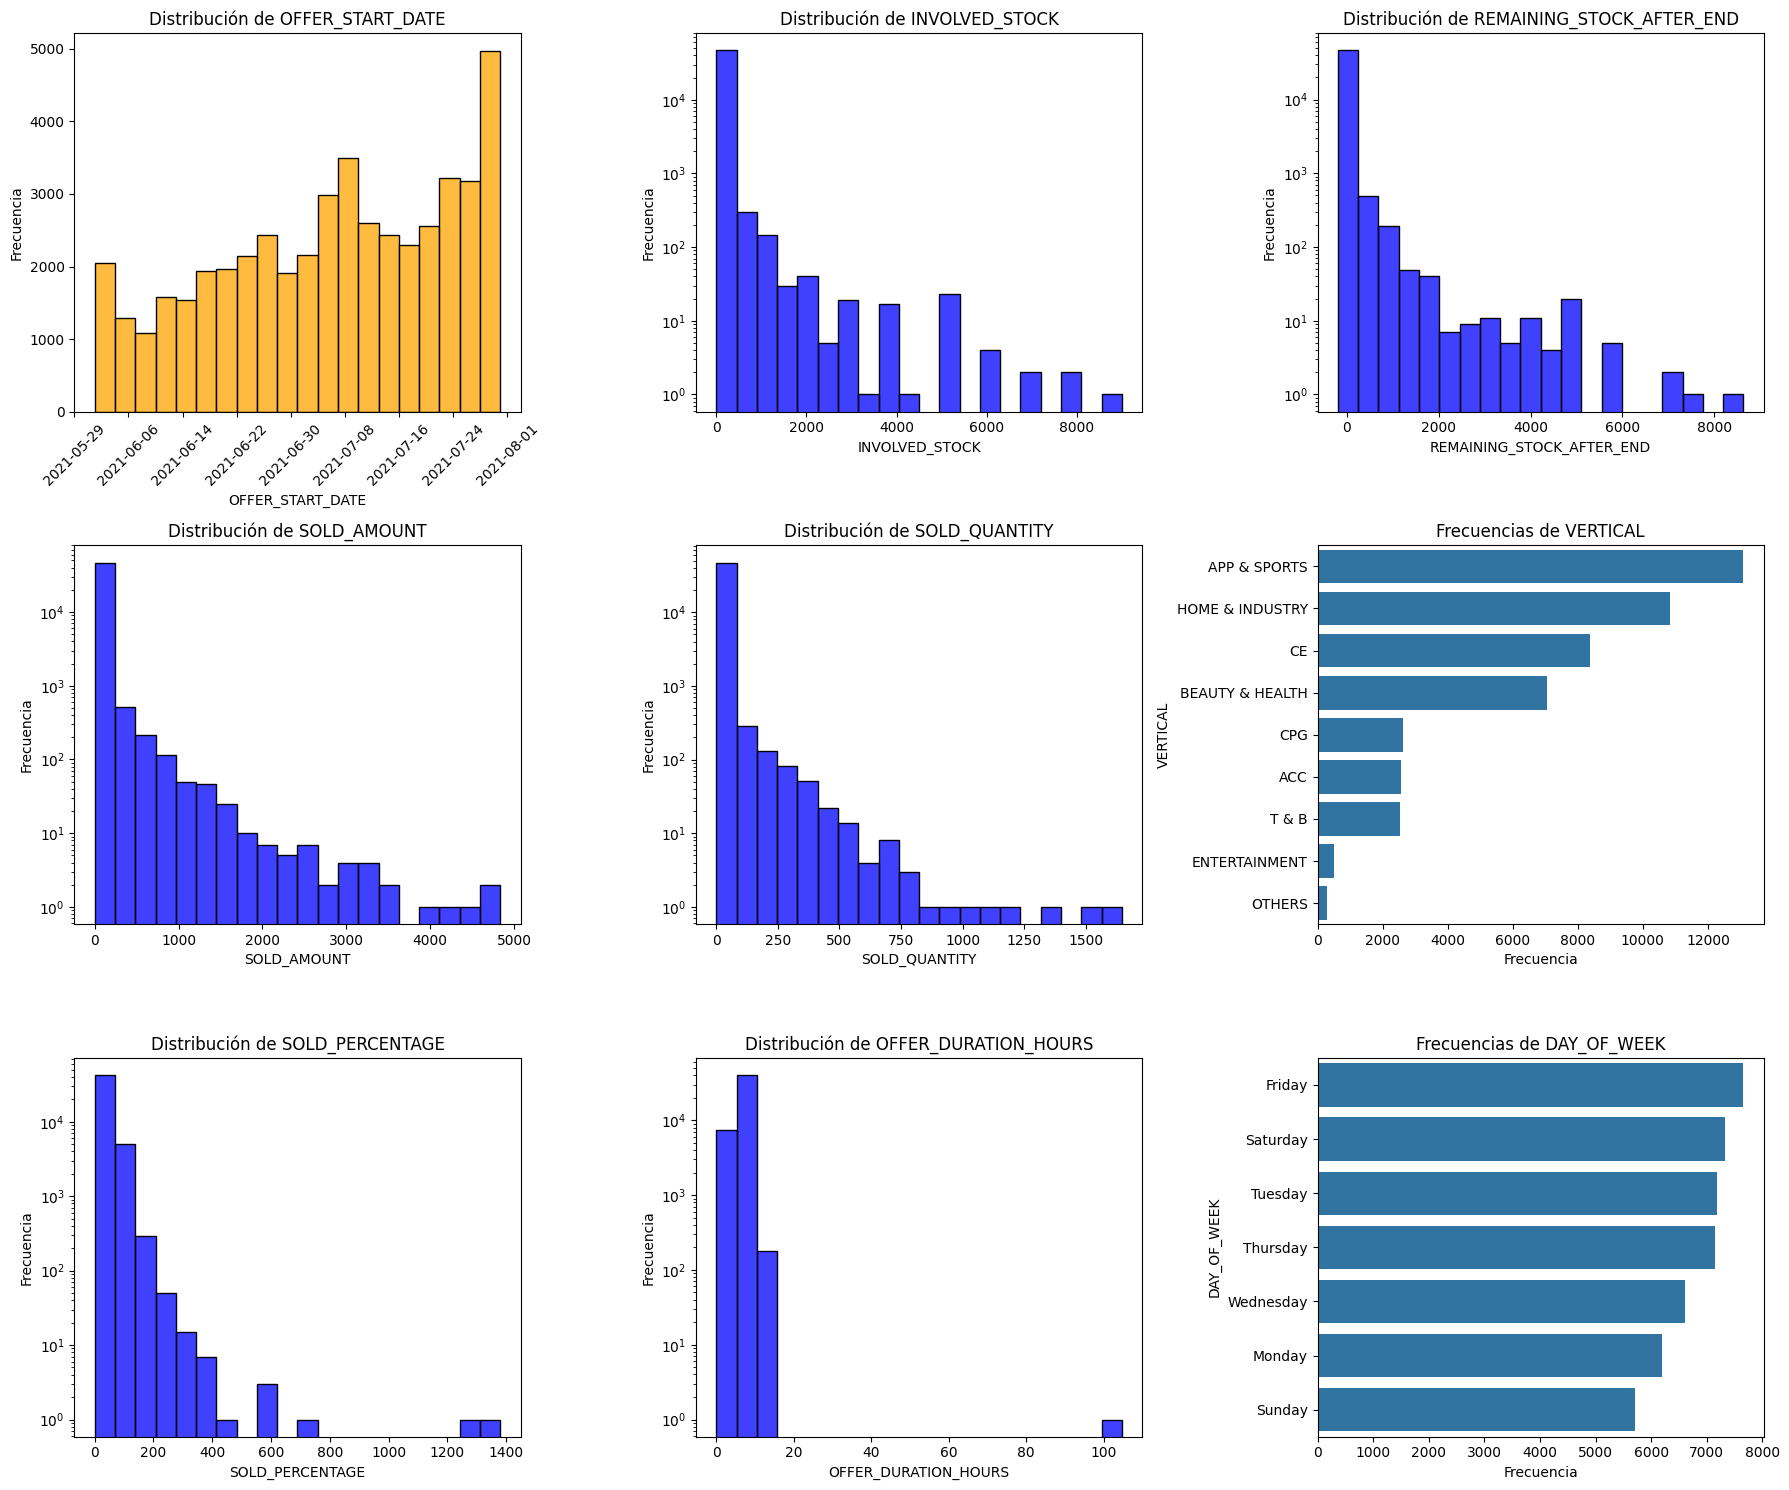

In [ ]:
# Lista de columnas a excluir
exclude_columns = ['OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'OFFER_TYPE', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE', 'DOM_DOMAIN_AGG1', 'DOMAIN_ID']

# Filtrar las columnas que se van a graficar
columns_to_plot = [col for col in df.columns if col not in exclude_columns]

# Número de gráficos por fila
cols_per_row = 3
total_columns = len(columns_to_plot)
rows = math.ceil(total_columns / cols_per_row)  # Calcular el número de filas necesarias

# Crear subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, rows * 5))  # Ajustar tamaño general
axes = axes.flatten()          # Aplanar la matriz de ejes para iterar fácilmente


for i, column in enumerate(columns_to_plot):
    ax = axes[i]


    if df[column].dtype == 'object' or str(df[column].dtype) == 'category':          # Si la columna es categórica o de tipo "object"
        sns.countplot(data=df, y=column, order=df[column].value_counts().index, ax=ax)
        ax.set_title(f'Frecuencias de {column}')
        ax.set_xlabel('Frecuencia')
        ax.set_ylabel(column)
    elif column == 'OFFER_START_DATE':  # Gráfico especial para OFFER_START_DATE
        sns.histplot(df[column], kde=False, bins=20, color='orange', ax=ax)
        ax.set_title(f'Distribución de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')
        ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas
        ax.xaxis.set_major_locator(plt.MaxNLocator(10))  # Reducir densidad de etiquetas
    else:  # Si la columna es numérica
        sns.histplot(df[column], kde=False, bins=20, color='blue', ax=ax)
        ax.set_title(f'Distribución de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')
        ax.set_yscale('log')  # Escala logarítmica en el eje Y


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])         # Ocultar ejes vacíos (si no se llenan todos los subplots)

plt.tight_layout()
plt.show()


**Búsqueda de correlaciones**

Se visualiza la matriz de correlaciones, que indica la dependencia lineal (o no) entre categorías.

Posterior a eso se realizan gráficos de dispersión entre las variables que presentaron índice de correlación mayor a 0.5

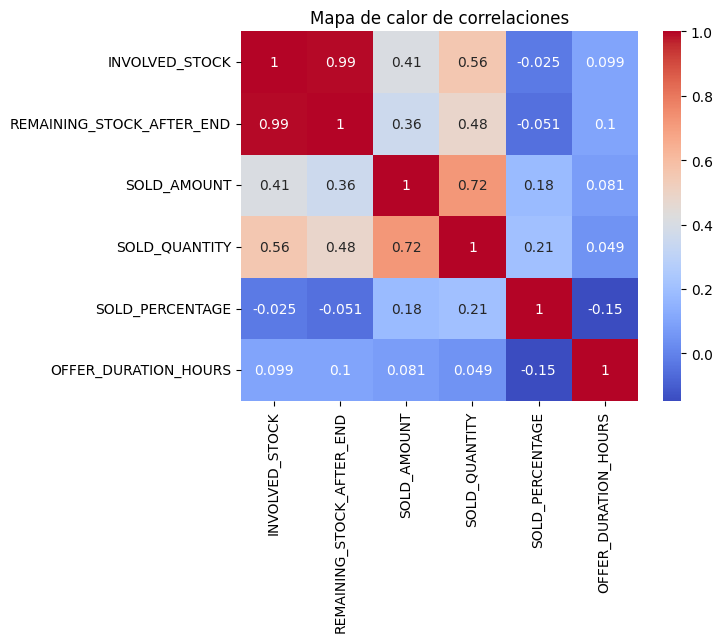

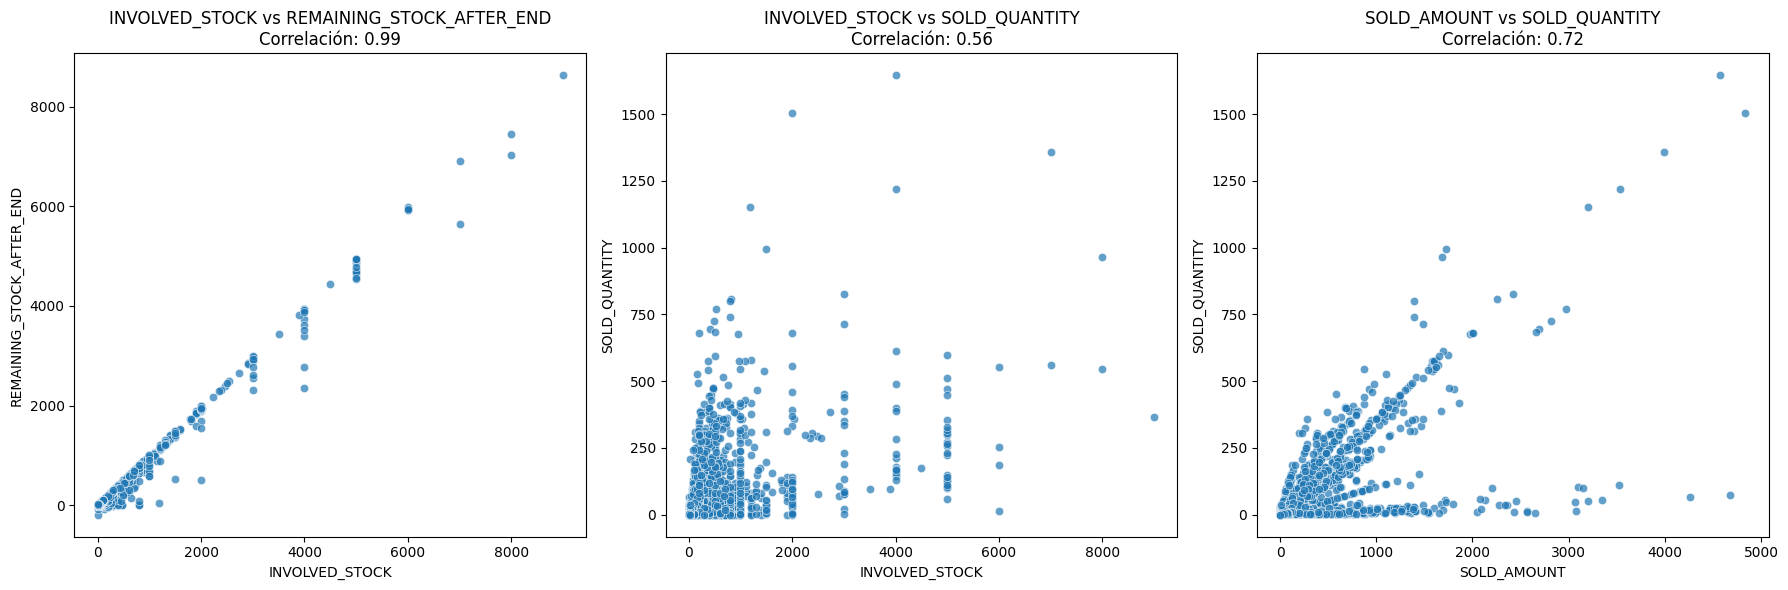

Se graficaron 3 combinaciones con correlación > 0.5:
INVOLVED_STOCK vs REMAINING_STOCK_AFTER_END: Correlación = 0.99
INVOLVED_STOCK vs SOLD_QUANTITY: Correlación = 0.56
SOLD_AMOUNT vs SOLD_QUANTITY: Correlación = 0.72


In [ ]:
# Mapa de calor con las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones')
plt.show()


# Calcular matriz de correlación
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Filtrar combinaciones con correlación absoluta mayor a 0.5
significant_combinations = [
    (x, y) for x, y in itertools.combinations(numeric_columns, 2)
    if abs(correlation_matrix.loc[x, y]) > 0.5
]

plots_per_row = 3
total_plots = len(significant_combinations)
rows = (total_plots + plots_per_row - 1) // plots_per_row  # Número de filas necesarias


fig, axes = plt.subplots(rows, plots_per_row, figsize=(18, rows * 6))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

# Gráficos de dispersión
for i, (x, y) in enumerate(significant_combinations):
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i], alpha=0.7)
    corr_value = correlation_matrix.loc[x, y]
    axes[i].set_title(f'{x} vs {y}\nCorrelación: {corr_value:.2f}')
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)


for j in range(len(significant_combinations), len(axes)):
    fig.delaxes(axes[j])          # Eliminar los subplots vacíos

plt.tight_layout()
plt.show()

# Mostrar las combinaciones seleccionadas
print(f'Se graficaron {len(significant_combinations)} combinaciones con correlación > 0.5:')
for x, y in significant_combinations:
    print(f'{x} vs {y}: Correlación = {correlation_matrix.loc[x, y]:.2f}')

El único que presenta una correlación evidente son las de Stock ofrecido y Stock remanente. Algo que era de esperarse debido a que al haber bajos porcentajes de ventas en todas las categorías, la relación entre ellos es casi uno a uno.

# **5) Profundización sobre cantidad de ventas - Análisis por categorías**

A continuación se presentan en detalle las distribuciones de frecuencias de Cantidad vendida y Porcentaje vendido.   

Luego se grafican las ventas totales por categoría vertical, y el porcentaje vendido en cada una de ellas.  


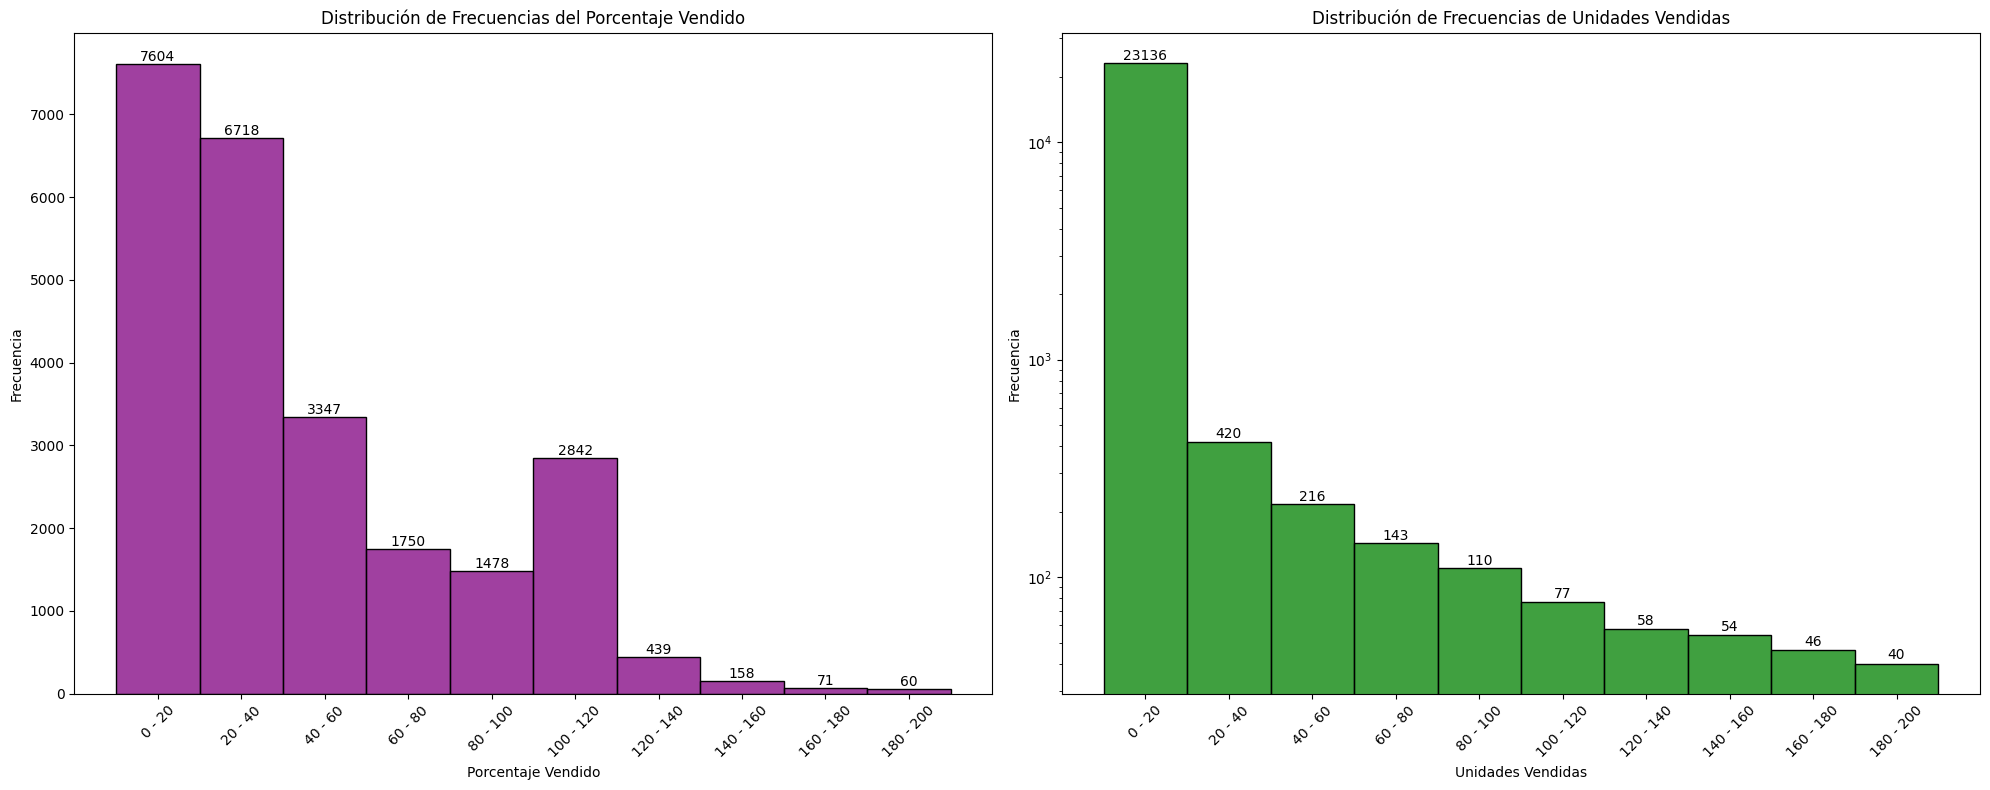

Los límites de los intervalos se toman de la siguiente manera: (0;20), [20;40), [40;60), [60;80), [80;100), [100;120), [120;140), [140;160), [160;180), [180,200]

Frecuencia de porcentajes vendidos mayores a 200: 81
Frecuencia de ofertas sin compradores (porcentaje igual a cero): 23272

Frecuencia de unidades vendidas mayores a 200: 248
Frecuencia de ofertas sin compradores (cantidad igual a cero): 23272


In [ ]:
# Configuración de las columnas a graficar
columns_to_plot = ['SOLD_PERCENTAGE', 'SOLD_QUANTITY']
titles = ['Distribución de Frecuencias del Porcentaje Vendido', 'Distribución de Frecuencias de Unidades Vendidas']
xlabels = ['Porcentaje Vendido', 'Unidades Vendidas']
colors = ['purple', 'green']
yscale_logs = [False, True]  # Escala logarítmica para SOLD_QUANTITY

# Límites de los intervalos
bins_limits = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]

fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # 1 fila, 2 columnas


for i, column in enumerate(columns_to_plot):
    ax = axes[i]


    filtered_data = df[df[column] > 0]   # Filtrar datos mayores a 0

    sns.histplot(filtered_data[column], bins=bins_limits, kde=False, color=colors[i], ax=ax)

    ax.set_title(titles[i])
    ax.set_xlabel(xlabels[i])
    ax.set_ylabel('Frecuencia')

    if yscale_logs[i]:  # Escala logarítmica
        ax.set_yscale('log')

    # Configurar las posiciones y etiquetas del eje X
    xticks_labels = [f"{bins_limits[j]} - {bins_limits[j+1]}" for j in range(len(bins_limits) - 1)]
    xticks_positions = [(bins_limits[j] + bins_limits[j+1]) / 2 for j in range(len(bins_limits) - 1)]
    ax.set_xticks(xticks_positions)
    ax.set_xticklabels(xticks_labels, rotation=45)

    # Agregar valores encima de cada barra
    for patch in ax.patches:
        height = patch.get_height()  # Altura de la barra (frecuencia)
        if height > 0:
            ax.text(
                patch.get_x() + patch.get_width() / 2,  # Posición horizontal (centro de la barra)
                height + 0.5,  # Posición vertical (ligeramente encima de la barra)
                f'{int(height)}',  # Texto a mostrar
                ha='center', va='bottom', fontsize=10, color='black'
            )

plt.tight_layout()
plt.show()

print("Los límites de los intervalos se toman de la siguiente manera: (0;20), [20;40), [40;60), [60;80), [80;100), [100;120), [120;140), [140;160), [160;180), [180,200]")

frecuencia_mayor_200 = df[df['SOLD_PERCENTAGE'] > 200].shape[0]
print(f"\nFrecuencia de porcentajes vendidos mayores a 200: {frecuencia_mayor_200}")
frecuencia_nula = df[df['SOLD_PERCENTAGE'] == 0].shape[0]
print(f"Frecuencia de ofertas sin compradores (porcentaje igual a cero): {frecuencia_nula}")

frecuencia_mayor_200 = df[df['SOLD_QUANTITY'] > 200].shape[0]
print(f"\nFrecuencia de unidades vendidas mayores a 200: {frecuencia_mayor_200}")
frecuencia_nula = df[df['SOLD_QUANTITY'] == 0].shape[0]
print(f"Frecuencia de ofertas sin compradores (cantidad igual a cero): {frecuencia_nula}")


De los gráficos y tablas vistas hasta el momento se desprende que:


*   La gran mayoría de las ofertas quedan sin ningún tipo de ventas: 23272 sobre un total de 47820, lo que representa casi un 50%.

*   De las ventas que sí se concretan, se observa gran predominancia de porcentajes bajos de ventas: (0-20%) y (20-40%) representan la mayor cantidad de registros, con apmplia diferencia respecto al resto.

*   En cuanto a unidades vendidas, también se observa que casi siempre son inferiores a 20 unidades (23136 sobre 24548 registros)



**Profundización sobre ventas por categoría**

Para esta parte calculamos una tabla nueva de totales por categoría, donde calculamos ventas totales, stock total ofrecido y porcentaje de ventas del total.

In [ ]:
# Agrupar y sumar las ventas totales y el stock total por categoría
ventas_totales = df.groupby('VERTICAL', observed=True)['SOLD_QUANTITY'].sum().reset_index()
stock_total = df.groupby('VERTICAL', observed=True)['INVOLVED_STOCK'].sum().reset_index()

ventas_totales.rename(columns={'SOLD_QUANTITY': 'VENTAS_TOTALES'}, inplace=True)
stock_total.rename(columns={'INVOLVED_STOCK': 'STOCK_TOTAL'}, inplace=True)

# Fusionar ambos DataFrames
totales = pd.merge(ventas_totales, stock_total, on='VERTICAL')

totales['VENTAS_TOTALES'] = totales['VENTAS_TOTALES'].astype(int)
totales['STOCK_TOTAL'] = totales['STOCK_TOTAL'].astype(int)

# Calcular el porcentaje de ventas
totales['VENTAS%_TOTAL'] = ((totales['VENTAS_TOTALES'] / totales['STOCK_TOTAL']) * 100).round(2)
totales['REMANENTE%_TOTAL'] = ((1-(totales['VENTAS_TOTALES'] / totales['STOCK_TOTAL'])) * 100).round(2)

# Mostrar el resultado
totales

,VERTICAL,VENTAS_TOTALES,STOCK_TOTAL,VENTAS%_TOTAL,REMANENTE%_TOTAL
0,ACC,5156,24468,21.07,78.93
1,APP & SPORTS,25651,238003,10.78,89.22
2,BEAUTY & HEALTH,178110,909081,19.59,80.41
3,CE,21804,203814,10.70,89.30
4,CPG,5690,38589,14.75,85.25
5,ENTERTAINMENT,357,3033,11.77,88.23
6,HOME & INDUSTRY,27155,218857,12.41,87.59
7,OTHERS,357,2855,12.50,87.50
8,T & B,2347,42321,5.55,94.45


Luego, a partir de la tabla nueva generada graficamos las ventas totales y el stock total por categoría y luego el porcentaje total.  

De los graficos y la tabla se observa que todas las ventas se encuentran entre el 5 y el 22% del stock ofrecido, siendo "ACC" la de mayor aceptación y "T & B" la de menor porcentaje.

A continuación se grafican en comparativa cuánto fue el stock ofecido y cuánto el vendido para cada categoría vertical. Y a su derecha se puede ver el porcentaje vendido en cada categoría.

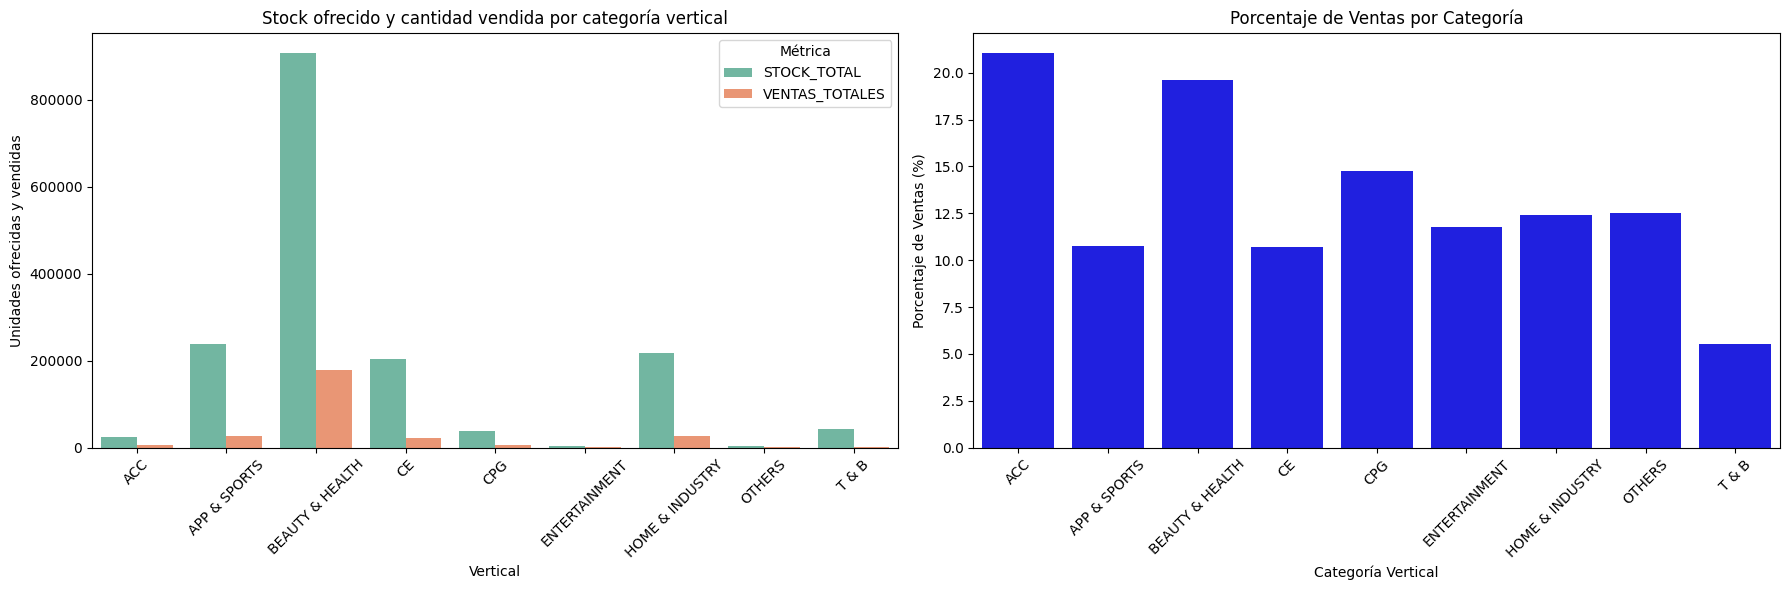

In [ ]:
# Reorganizar la tabla de totales al formato "largo"
totales_largo = totales.melt(id_vars='VERTICAL', value_vars=['STOCK_TOTAL', 'VENTAS_TOTALES'], var_name='Métrica', value_name='Unidades')


fig, axes = plt.subplots(1, 2, figsize=(18, 6))  #figura con dos gráficos en la misma fila

# Gráfico 1: Stock vs Ventas
sns.barplot(data=totales_largo, x='VERTICAL', y='Unidades', hue='Métrica', palette='Set2', ax=axes[0])
axes[0].set_title('Stock ofrecido y cantidad vendida por categoría vertical')
axes[0].set_xlabel('Vertical')
axes[0].set_ylabel('Unidades ofrecidas y vendidas')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Métrica')

# Gráfico 2: Porcentaje de Ventas
sns.barplot(data=totales, x='VERTICAL', y='VENTAS%_TOTAL', color='blue', errorbar=None, ax=axes[1])
axes[1].set_title('Porcentaje de Ventas por Categoría')
axes[1].set_ylabel('Porcentaje de Ventas (%)')
axes[1].set_xlabel('Categoría Vertical')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


A continuación se exploran las ventas por subcategoría (es decir DOM_DOMAIN_AGG1), observando que la subcategoría que presenta mayor cantidad de ventas - muy por encima del resto - es Pharmaceutics.

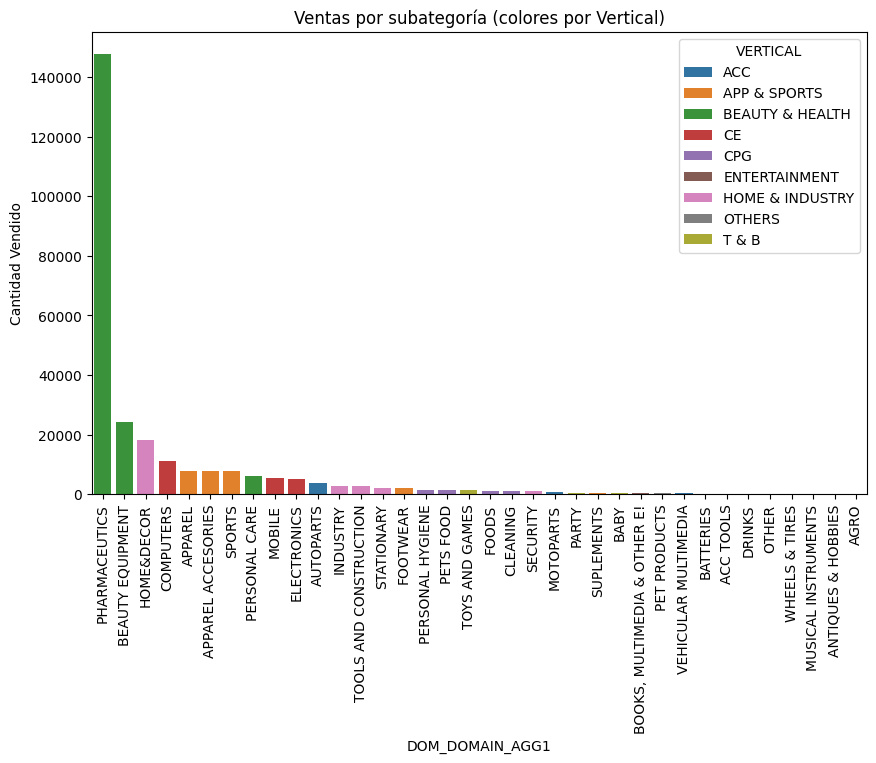

In [ ]:
# Ventas por subcategoría
ventas_subcategoria = df.groupby(['DOM_DOMAIN_AGG1', 'VERTICAL'], observed=True)['SOLD_QUANTITY'].sum().reset_index()

# se ordenan de mayor a menor por la cantidad total de ventas
ventas_subcategoria = ventas_subcategoria.sort_values(by='SOLD_QUANTITY', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=ventas_subcategoria, x='DOM_DOMAIN_AGG1', y='SOLD_QUANTITY', hue='VERTICAL', palette='tab10', order=ventas_subcategoria['DOM_DOMAIN_AGG1'])
plt.title('Ventas por subategoría (colores por Vertical)')
plt.ylabel('Cantidad Vendido')
plt.xticks(rotation=90)
plt.show()

# **6) Profundización sobre cantidad de ventas - Análisis temporal**

A continuación se grafican las ventas por día para cada categoría.

In [ ]:
#Gráfico de dispersión de SOLD_QUANTITY versus el día (OFFER_START_DATE), diferenciando por VERTICAL.

def scatter_by_vertical(vertical):

  clear_output(wait=True)       # Cerramos los gráficos previos para que se actualice cada vez que cambiamos en el menú desplegable

  filtered_data = df[df['VERTICAL'] == vertical]
  grouped_data = filtered_data.groupby('OFFER_START_DATE')['SOLD_QUANTITY'].sum().reset_index()


  plt.figure(figsize=(12,6))
  sns.scatterplot(data = grouped_data, x='OFFER_START_DATE', y='SOLD_QUANTITY', color='blue', alpha=0.7)
  plt.title(f'Cantidad vendida por día de la categoría {vertical}')
  plt.xlabel('Fecha de Inicio de la Oferta')
  plt.ylabel('Cantidad Vendida')

  ax = plt.gca()  # Obtener el objeto de los ejes actuales
  ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SU))  # Mostrar solo los domingos
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de fecha

  #plt.legend(title='Vertical', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

  return None  # Evita que la función genere texto no deseado

unique_verticals = df['VERTICAL'].unique()
interact(scatter_by_vertical,vertical=widgets.Dropdown(options=unique_verticals,description='Vertical:'));

interactive(children=(Dropdown(description='Vertical:', options=('CPG', 'OTHERS', 'CE', 'APP & SPORTS', 'T & B…

**Ventas por día de la semana**

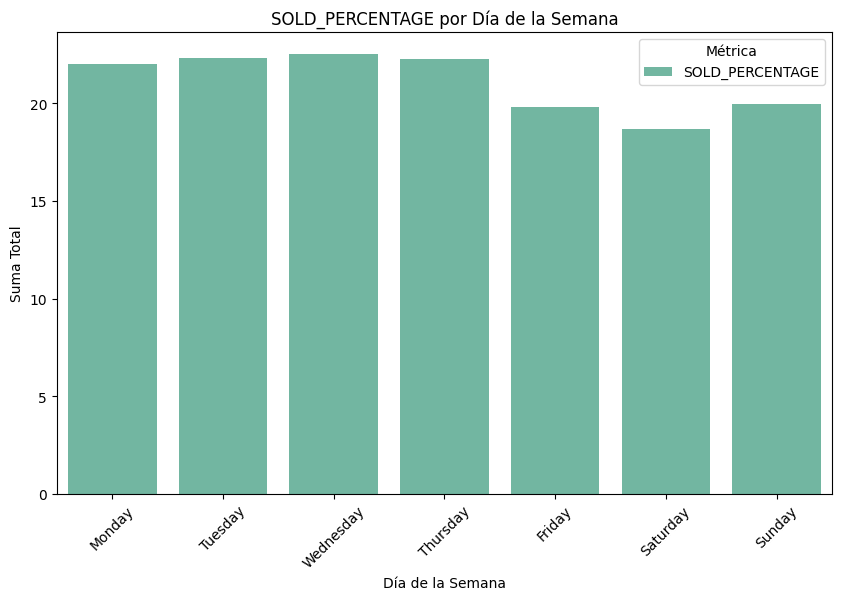

In [ ]:
# Relación entre unidades vendidas y día de la semana

# Agrupamos por día de la semana y calcular la suma de INVOLVED_STOCK y SOLD_QUANTITY
grouped_data = df.groupby('DAY_OF_WEEK')[['SOLD_PERCENTAGE']].mean().reset_index()

# Ordenar los días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
grouped_data['DAY_OF_WEEK'] = pd.Categorical(grouped_data['DAY_OF_WEEK'], categories=days_order, ordered=True)
grouped_data = grouped_data.sort_values('DAY_OF_WEEK')


plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data.melt(id_vars='DAY_OF_WEEK', var_name='Metric', value_name='Value'),
            x='DAY_OF_WEEK', y='Value', hue='Metric', palette='Set2')

plt.title('SOLD_PERCENTAGE por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Suma Total')
plt.legend(title='Métrica')
plt.xticks(rotation=45)
plt.show()

Puede observarse que las ventas suelen caer en los fines de semana.

**Análisis de la duración de las ofertas**

En el primer gráfico de histogramas de frecuencias se detectó que el eje X para duración de la oferta sobrepasaba las 100 horas, por lo que en primer lugar se crea una subtabla ordenando de mayor a menor las duraciones para ver cuales son los valores adecuados.

Se observa un outlier para este caso, porque una oferta de 100 horas no podría ser una oferta relámpago, por lo que evidentemente está mal etiquetada.

Luego para el gráfico de frecuencias se fijan los límites manualmente para no tomar este outlier

In [ ]:
# Crear una tabla con las duraciones de las ofertas ordenadas de mayor a menor
durations_table = df['OFFER_DURATION_HOURS'].value_counts().reset_index()
durations_table.columns = ['Duración (Horas)', 'Frecuencia']
durations_table = durations_table.sort_values(by='Duración (Horas)', ascending=False)

print(durations_table)

      Duración (Horas)  Frecuencia
1986        104.752500           1
1623         15.619167           1
1611         14.668611           1
1609         14.629722           1
1634         14.619722           1
...                ...         ...
19            0.001111         223
16            0.000833         408
12            0.000556         604
11            0.000278         699
8             0.000000        1271

[4489 rows x 2 columns]


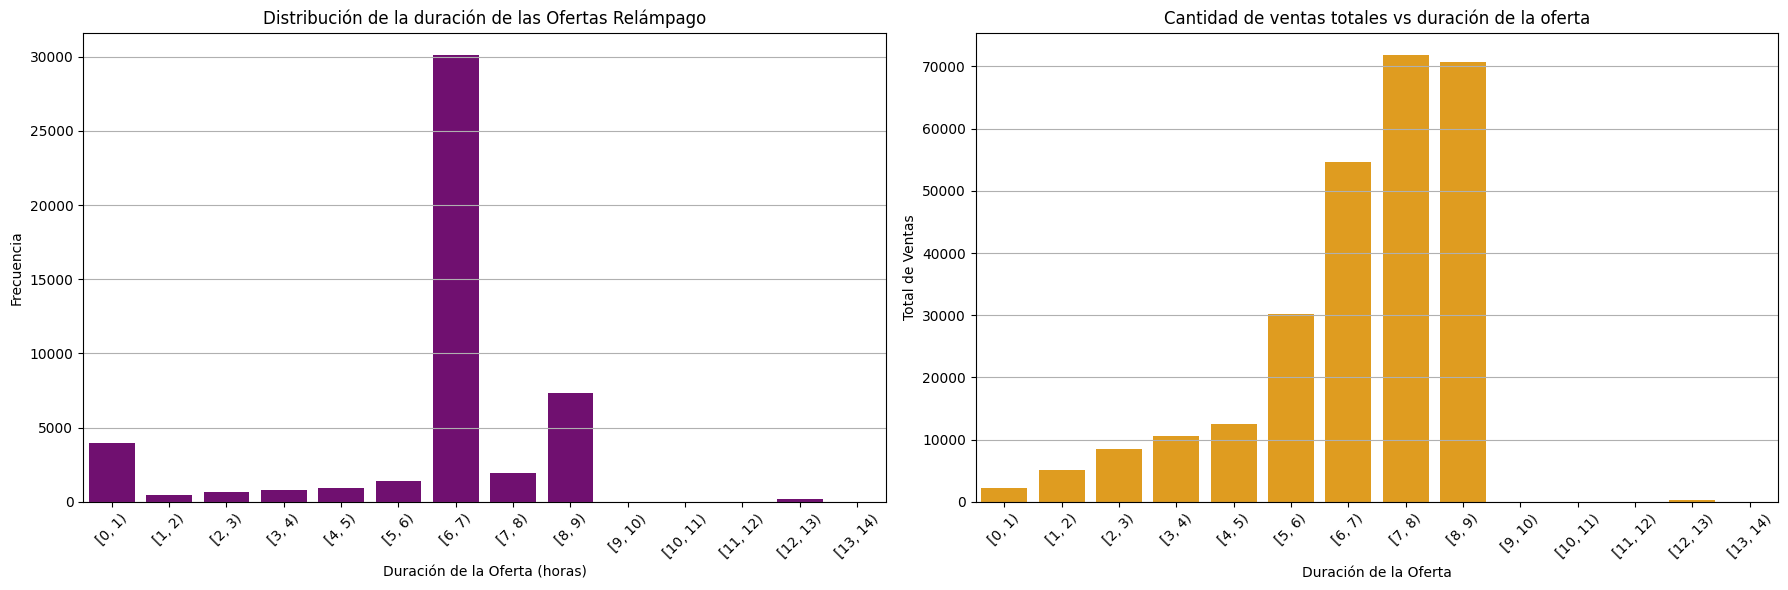

In [ ]:

bins_limits = range(0, 15, 1)  # intervalos de duración de la oferta en horas

# Se crea la variable categórica que contiene el intervalo de duración
df['DURACION_INTERVALO'] = pd.cut(df['OFFER_DURATION_HOURS'], bins=bins_limits, right=False)

# Se agrupa por duración y se cuenta frecuencia
duracion_frecuencia = df['DURACION_INTERVALO'].value_counts().sort_index().reset_index()
duracion_frecuencia.columns = ['DURACION_INTERVALO', 'FRECUENCIA']

# Se agrupa por duración y se suman las ventas totales
ventas_por_duracion = df.groupby('DURACION_INTERVALO', observed=True)['SOLD_QUANTITY'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Histograma de duración de ofertas
sns.barplot(data=duracion_frecuencia, x='DURACION_INTERVALO', y='FRECUENCIA', color='purple', ax=axes[0])
axes[0].set_title('Distribución de la duración de las Ofertas Relámpago')
axes[0].set_xlabel('Duración de la Oferta (horas)')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')

# Gráfico 2: Cantidad total de ventas por duración
sns.barplot(data=ventas_por_duracion, x='DURACION_INTERVALO', y='SOLD_QUANTITY', color='orange', ax=axes[1])
axes[1].set_title('Cantidad de ventas totales vs duración de la oferta')
axes[1].set_xlabel('Duración de la Oferta')
axes[1].set_ylabel('Total de Ventas')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


Puede observarse que la gran mayoría de las ofertas relámpago duran entre 6 y 7 horas (más de 30.000) y que también hay una cantidad importante de ofertas que duran entre 0 y 1 hora o entre 8 y 9 horas.

Resulta interesante ver que a pesar de que no es tanta la cantidad de ofertas que duran entre 7 y 8 horas (son aprox. 3.000 ofertas contra 30.000 que duran 6 a 7 horas) Este es el rango de duración que tiene mayor cantidad de unidades vendidas.


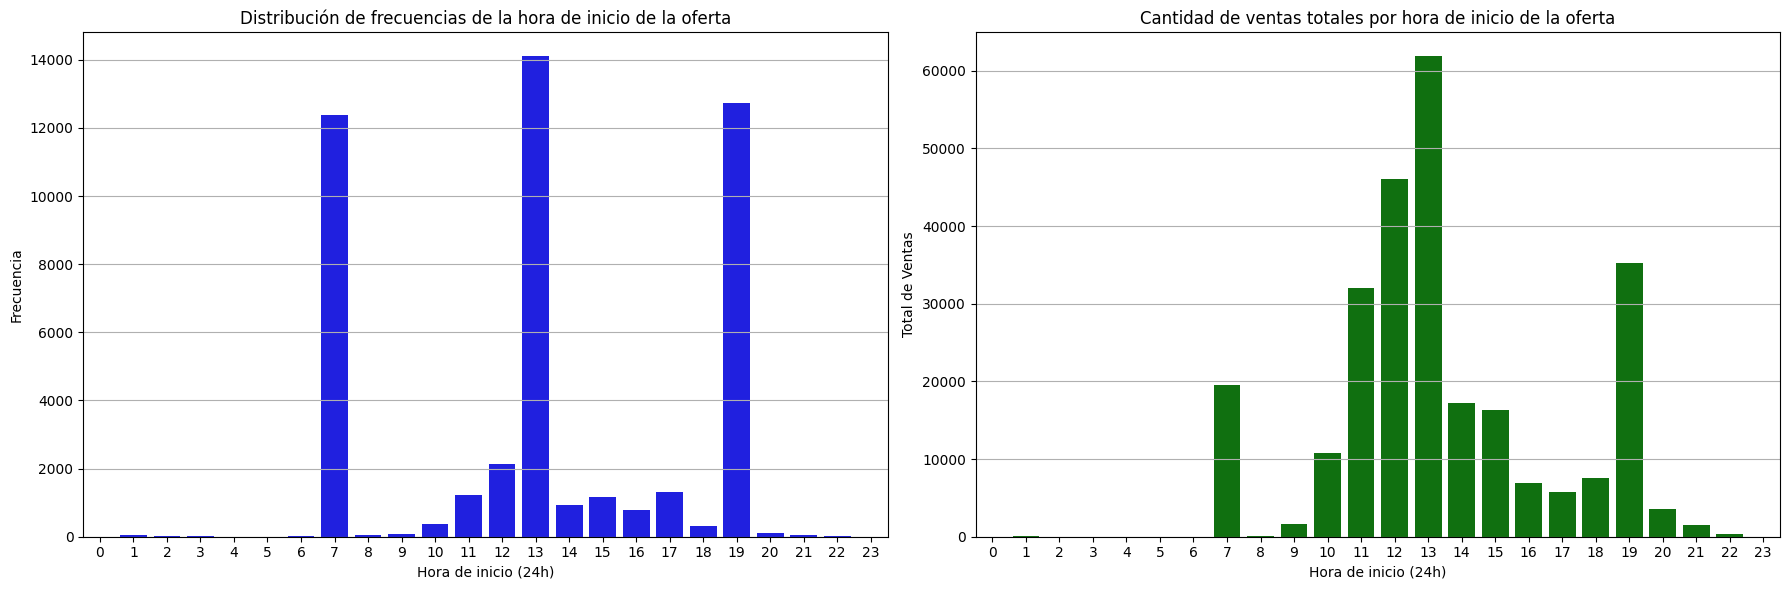

In [ ]:
# Nueva columna con la hora de inicio de la oferta
df['HORA_INICIO'] = df['OFFER_START_DTTM'].dt.hour

# Agrupar por hora de inicio y contar la cantidad de ofertas
frecuencia_horas = df['HORA_INICIO'].value_counts().reset_index()
frecuencia_horas.columns = ['HORA_INICIO', 'FRECUENCIA']
frecuencia_horas = frecuencia_horas.sort_values(by='HORA_INICIO')
ventas_por_hora = df.groupby('HORA_INICIO', observed=True)['SOLD_QUANTITY'].sum().reset_index()  # Agrupar por hora de inicio y sumar las ventas totales

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# **Gráfico 1 (Izquierda)
sns.barplot(data=frecuencia_horas, x='HORA_INICIO', y='FRECUENCIA', color='blue', ax=axes[0])
axes[0].set_title('Distribución de frecuencias de la hora de inicio de la oferta')
axes[0].set_xlabel('Hora de inicio (24h)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticks(range(0, 24))
axes[0].grid(axis='y')

# **Gráfico 2 (Derecha)
sns.barplot(data=ventas_por_hora, x='HORA_INICIO', y='SOLD_QUANTITY', color='green', ax=axes[1])
axes[1].set_title('Cantidad de ventas totales por hora de inicio de la oferta')
axes[1].set_xlabel('Hora de inicio (24h)')
axes[1].set_ylabel('Total de Ventas')
axes[1].set_xticks(range(0, 24))
axes[1].grid(axis='y')
plt.tight_layout()
plt.show()


Es interesante ver cómo las horas fuertes del inicio de la oferta son marcadamente las 7, 13 y 19 horas.

Sin embargo la cantidad de unidades vendidas está bastante más repartida entre las horas del día.  
Si bien se ve que las ofertas que comenzaron a las 13 horas son las que mayor cantidad de artículos vendieron, las de 11 y 12 horas le siguen en cantidad de ventas, siendo horarios de mucho menor oferta que a las 19 horas.

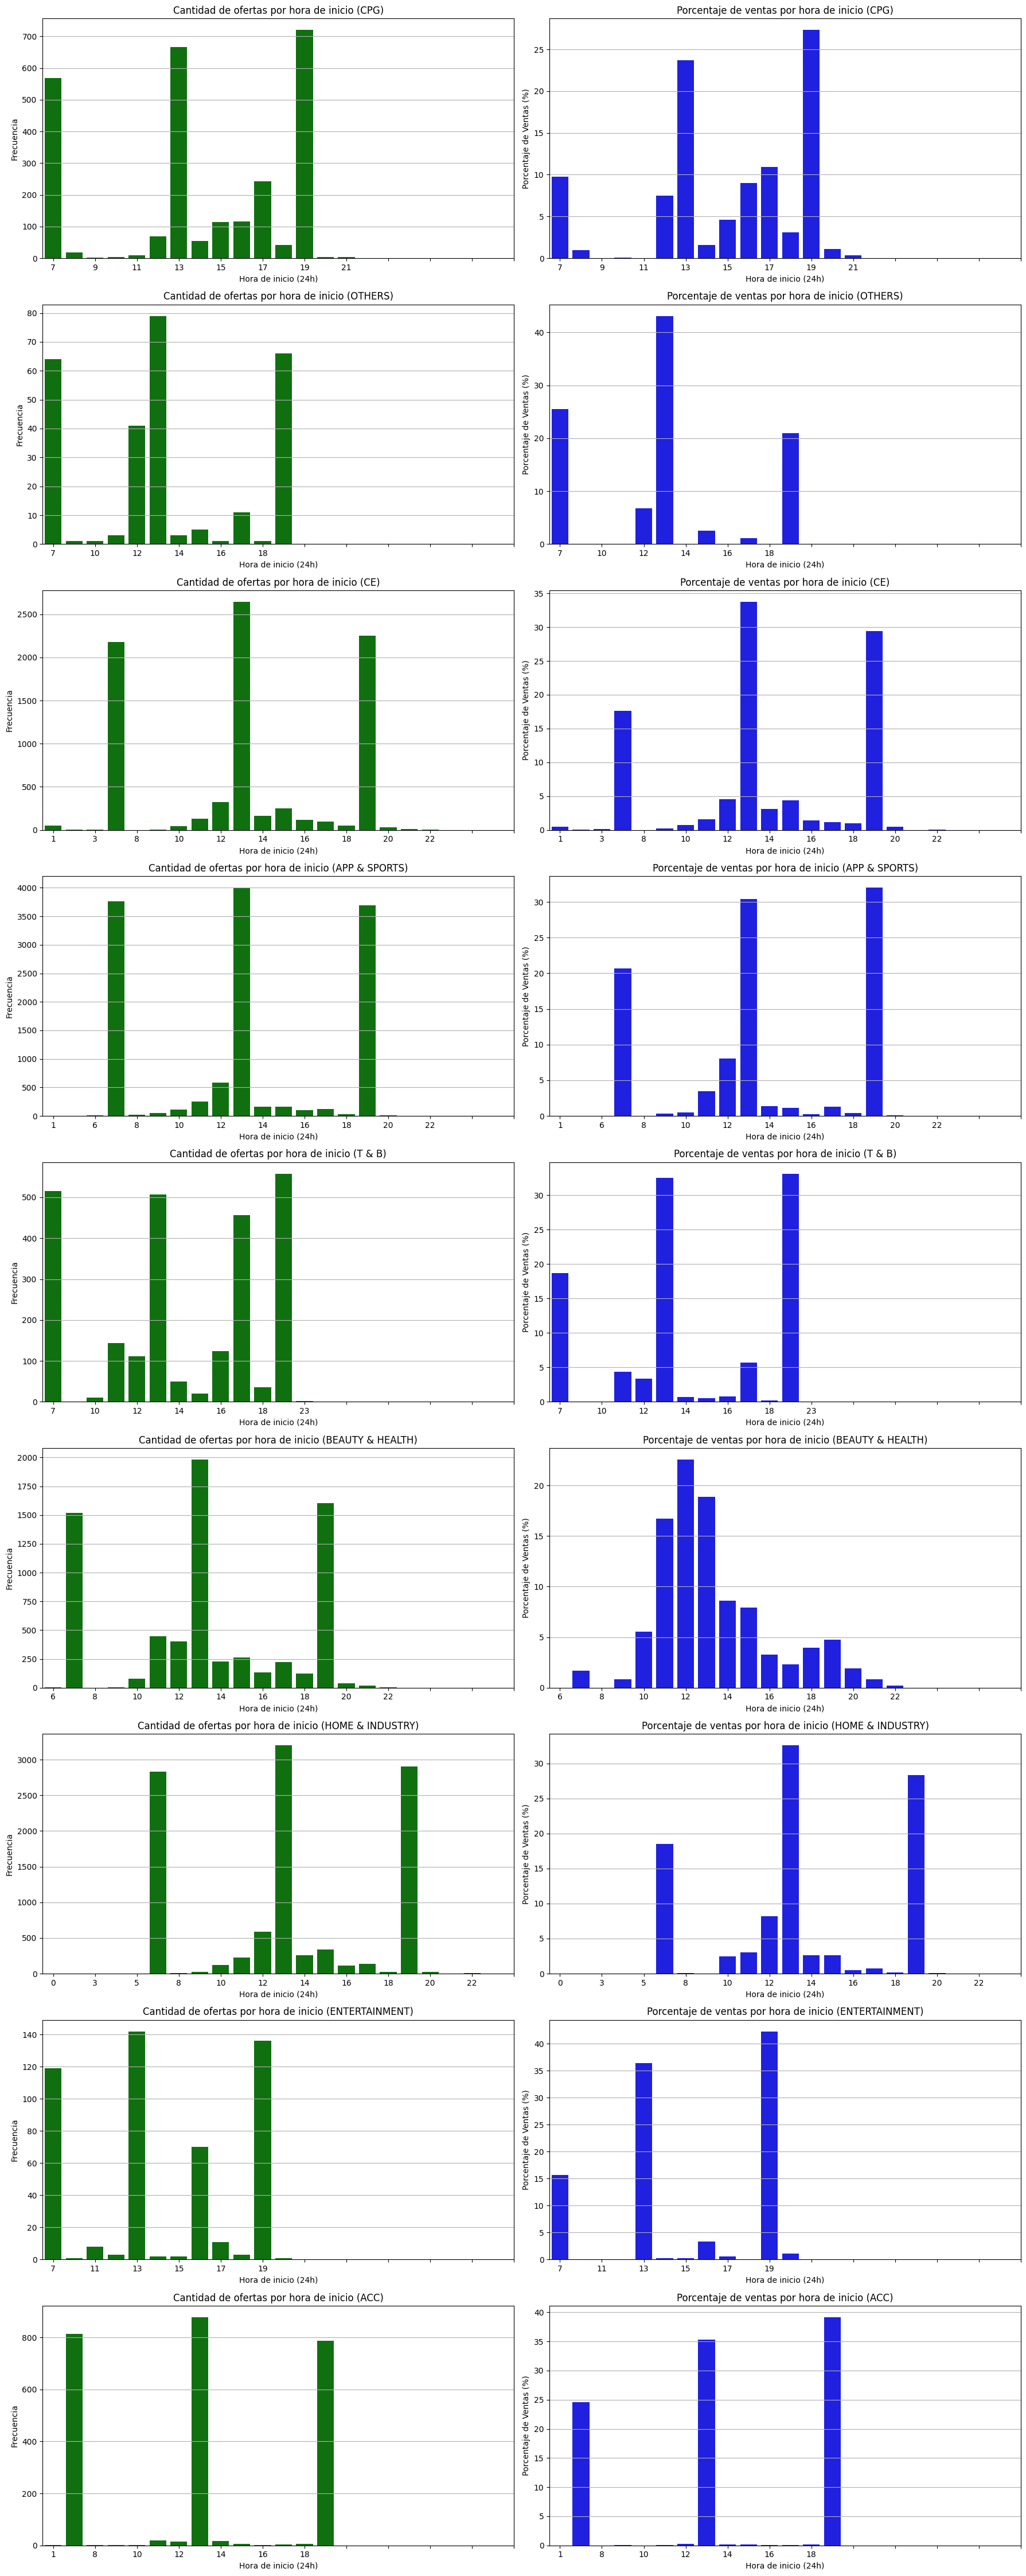

In [ ]:
verticales = df['VERTICAL'].unique()  # categorías únicas de VERTICAL
total_verticales = len(verticales)

cols = 2  # Dos gráficos por categoría
rows = math.ceil(total_verticales)  # Cada categoría ocupa una fila

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))  # Ajuste de tamaño
axes = axes.flatten()  # Aplanar la matriz de ejes para iterar fácilmente

for i, vertical in enumerate(verticales):

    df_vertical = df[df['VERTICAL'] == vertical] # Filtrar datos de la categoría

    # Distribución de frecuencia de la hora de inicio (IZQUIERDA)
    frecuencia_horas = df_vertical['HORA_INICIO'].value_counts().reset_index()
    frecuencia_horas.columns = ['HORA_INICIO', 'FRECUENCIA']
    frecuencia_horas = frecuencia_horas.sort_values(by='HORA_INICIO')  # Ordenar por hora

    sns.barplot(data=frecuencia_horas, x='HORA_INICIO', y='FRECUENCIA', color='green', ax=axes[i * 2])
    axes[i * 2].set_title(f'Cantidad de ofertas por hora de inicio ({vertical})')
    axes[i * 2].set_xlabel('Hora de inicio (24h)')
    axes[i * 2].set_ylabel('Frecuencia')
    axes[i * 2].set_xticks(range(0, 24, 2))  # Mostrar cada 2 horas
    axes[i * 2].grid(axis='y')

    # Porcentaje de ventas por hora (DERECHA)
    total_ventas_vertical = df_vertical['SOLD_QUANTITY'].sum()
    ventas_por_hora = df_vertical.groupby('HORA_INICIO', observed=True)['SOLD_QUANTITY'].sum().reset_index()
    ventas_por_hora['PCT_VENTAS'] = (ventas_por_hora['SOLD_QUANTITY'] / total_ventas_vertical) * 100

    sns.barplot(data=ventas_por_hora, x='HORA_INICIO', y='PCT_VENTAS', color='blue', ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_title(f'Porcentaje de ventas por hora de inicio ({vertical})')
    axes[i * 2 + 1].set_xlabel('Hora de inicio (24h)')
    axes[i * 2 + 1].set_ylabel('Porcentaje de Ventas (%)')
    axes[i * 2 + 1].set_xticks(range(0, 24, 2))
    axes[i * 2 + 1].grid(axis='y')

# Eliminar subplots vacíos si la cantidad de categorías es impar
for j in range(i * 2 + 2, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Puede observarse que la categoría "Beauty & Health" (que ya vimos que es la categoría dominante en ventas, tiene justamente la misma distribución de frecuencias que los porcentajes de ventas totales.

En cambio hay muchas categorías, como ACC, APP&SPORTS y ENTERTAINMENT, cuya distribución de porcentajes de ventas, son muy parecidos a las horas de inicio preponderantes de las ofertas, es decir que tienen barras más elevadas a las 7,13 y 19 hs.

# **7) Conclusiones**

Entre toda la información observda y los gráficos que se pudieron realizar, se pueden destacar algunas cuestiones interesantes:

*   Hay una categoría dominante en cantidad de ventas por sobre el resto que es BEAUTY&HEALTH con una subcategoría en particular que es Pharmaceutics. Esto puede estar vinculado al tiempo bajo análisis, dado que en los meses de junio a agosto de 2021 todavía estábamos en Pandemia de COVID-19
*   Hay horas muy marcadas a las cuales las ofertas son lanzadas, 7, 13 y 19 hs. La mayoría de las categorías tienen mayores porcentajes de ventas en esas mismas horas, a excepción de justamente BEAUTY&HEALTH que tiene una distribución de ventas más equilibrada.
*   No se ven diferencias grandes de ventas en cuanto a los días de las ofertas, aunque hay una ligera tendencia a disminuir los fines de semana (viernes, sábado y domingo).
*   Si bien la duración mayoritaria de las ofertas es de 6 a 7 horas, estas ofertas no son las que tienen mayores cantidades de ventas. Las ofertas más largas (de 7 a 8 y 8 a 9 horas) tienen mayores ventas todavía.
*   Los porcentajes de ventas para todas las categorías se encuentran entre el 5 y el 22% del stock ofrecido, siendo "ACC" la de mayor aceptación y "T & B" la de menor porcentaje.

